# How to: Cold load sweep analysis 
How to analyze a cold load sweep data set using the velma branch of nistqsptdm repository.  Data stored in a .json file in custom data format IVColdloadSweepData within iv_data.py.  A data map csv file is also required to map readout channels to detector names.

Uses file example_data/example_IVColdloadSweepData.json.
This file is the same as /data/uber_omt/20231013/taurus_ColumnA_ivs_20231114_1699985874.json



In [1]:
# the python modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget 

import sys
sys.path.append('/Users/hubmayr/nistgit/nistqsptdm/')
import detchar
import detchar.analysis.ivAnalysis_utils as ivut
from detchar.analysis.detector_map import DetectorMap

In [2]:
file = 'example_data/example_IVColdloadSweepData.json' 
detector_map_file = 'example_data/dmap_IVColdloadSweepData.csv'


In [3]:
dm = DetectorMap(detector_map_file) # instance of detector map file
ivcl = ivut.IVColdloadSweepAnalyzer(file,dm) # main class for analysis of an IV cold load sweep

In [142]:
# helper functions
def get_predicted_power_for_row(row_index,cl_indices):
    ''' return top-hat-band predicted power to be used to determine optical efficiency '''
    [fstart,fend] = dm.map_dict['Row%02d'%row_index]['freq_edges_ghz']
    predicted_power_w = []
    for t in np.array(ivcl.post_cl_temps_k)[cl_indices,0]:
        predicted_power_w.append(ivut.thermalPower(fstart*1e9,fend*1e9,t))
    return np.array(predicted_power_w)

## Check environmental conditions
What coldload and bath temperatures does this data file have?  Where these commanded values acheived?

In [5]:
ivcl.print_info()

Coldload set temperatures:  [0, 5, 6, 7, 8, 9, 10, 11, 12]
Measured coldload temperatures:  [ 3.944931   4.999988   6.000033   7.0000505  8.0000065  9.0000405
 10.00015   11.000125  12.000065 ]
ADR set temperatures:  [0.1]
use plot_measured_cl_temps() and plot_measured_bath_temps() to determine if set temperatures were achieved


cl temp:  0  Bath temp =  0.1  Pre IV temp =  0.0999455  Post IV temp =  0.100067
cl temp:  5  Bath temp =  0.1  Pre IV temp =  0.100029  Post IV temp =  0.10006
cl temp:  6  Bath temp =  0.1  Pre IV temp =  0.09995  Post IV temp =  0.10008
cl temp:  7  Bath temp =  0.1  Pre IV temp =  0.0999717  Post IV temp =  0.10006
cl temp:  8  Bath temp =  0.1  Pre IV temp =  0.100039  Post IV temp =  0.100054
cl temp:  9  Bath temp =  0.1  Pre IV temp =  0.0999507  Post IV temp =  0.10004
cl temp:  10  Bath temp =  0.1  Pre IV temp =  0.100026  Post IV temp =  0.100075
cl temp:  11  Bath temp =  0.1  Pre IV temp =  0.099985  Post IV temp =  0.10007
cl temp:  12  Bath temp =  0.1  Pre IV temp =  0.10003  Post IV temp =  0.100067


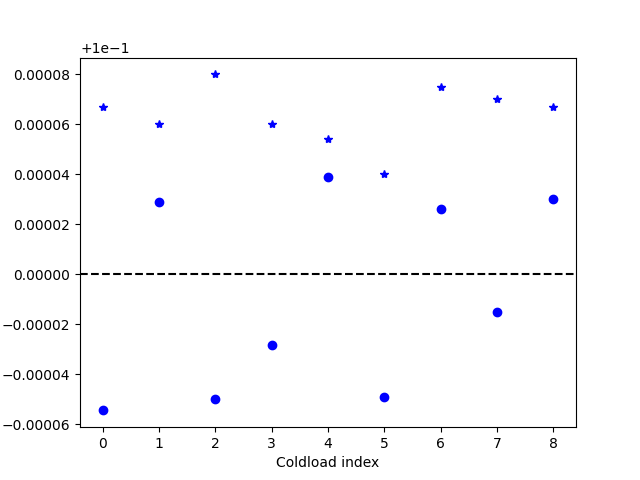

In [6]:
plt.figure()
ivcl.plot_measured_bath_temps()

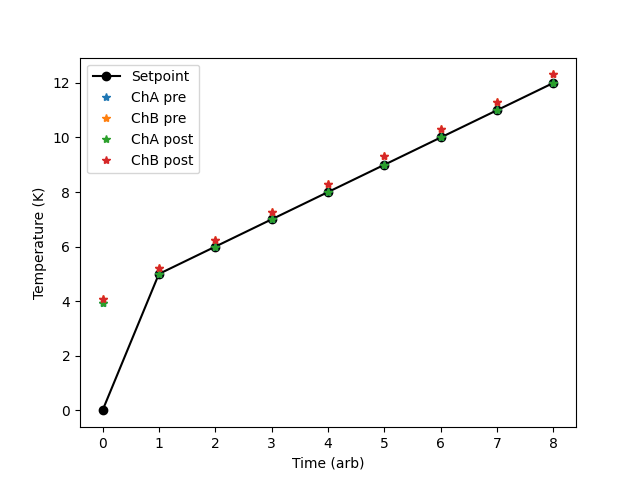

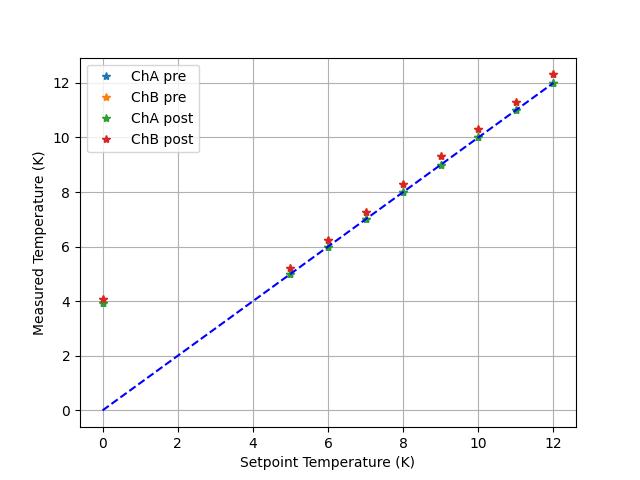

In [7]:
#plt.figure()
ivcl.plot_measured_cl_temps() # there are two thermometers on the load "ChA" and "ChB"

In [8]:
ivcl.pre_cl_temps_k # explicitly list the measured coldload temperatures

[[3.945021, 4.084713],
 [4.999951, 5.214085],
 [6.000051, 6.259],
 [6.99999, 7.276658],
 [7.999935, 8.290349],
 [9.0001, 9.306377],
 [10.00014, 10.31623],
 [10.99999, 11.31683],
 [12.00011, 12.31105]]

## check detector data quality

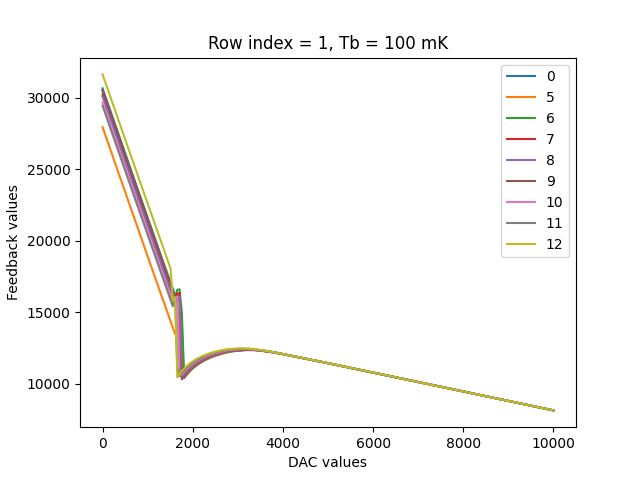

In [9]:
# change index to see data quality for a particular detector
ivcl.plot_cl_temp_sweep_for_row(row_index=1,bath_temp_index=0) 

# Single device optical efficiency analysis

In [10]:
row_index = 4
cl_indices = list(range(1,8))
predicted_power_w = get_predicted_power_for_row(row_index,cl_indices)

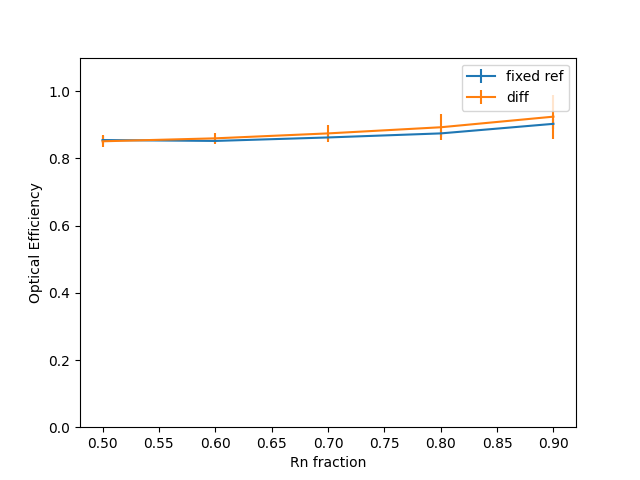

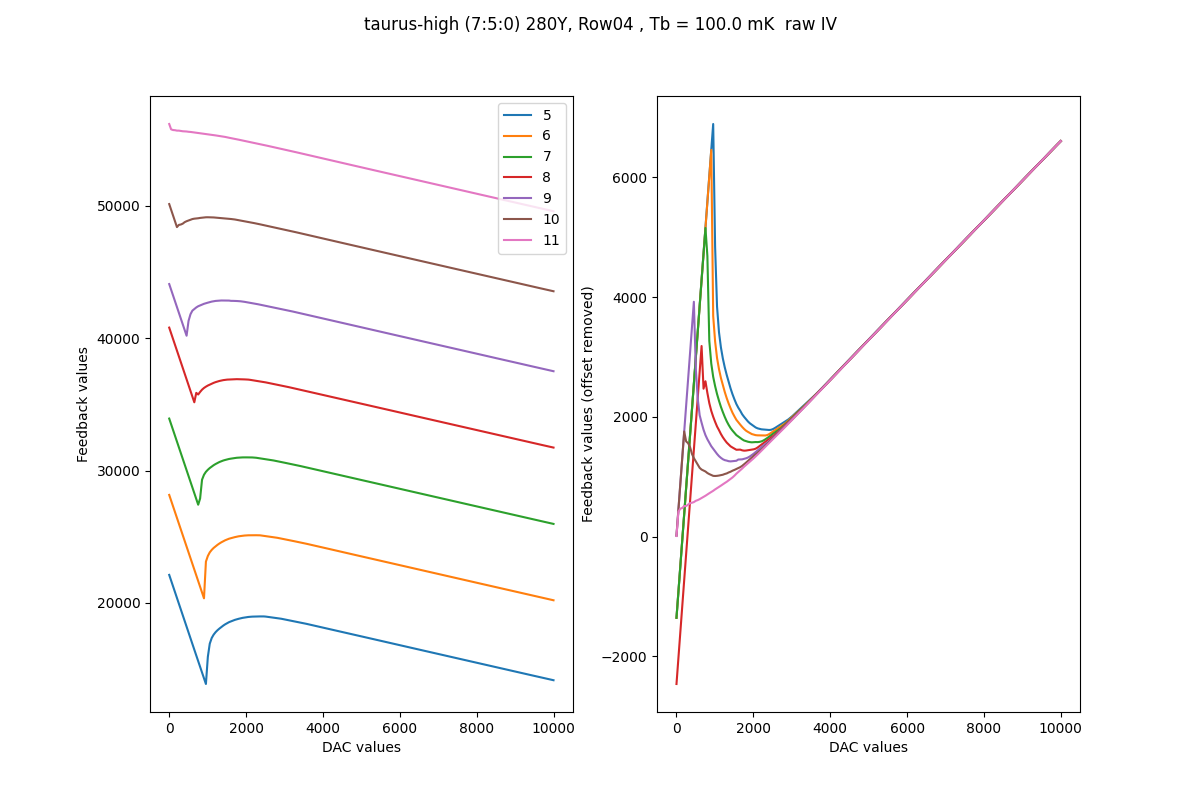

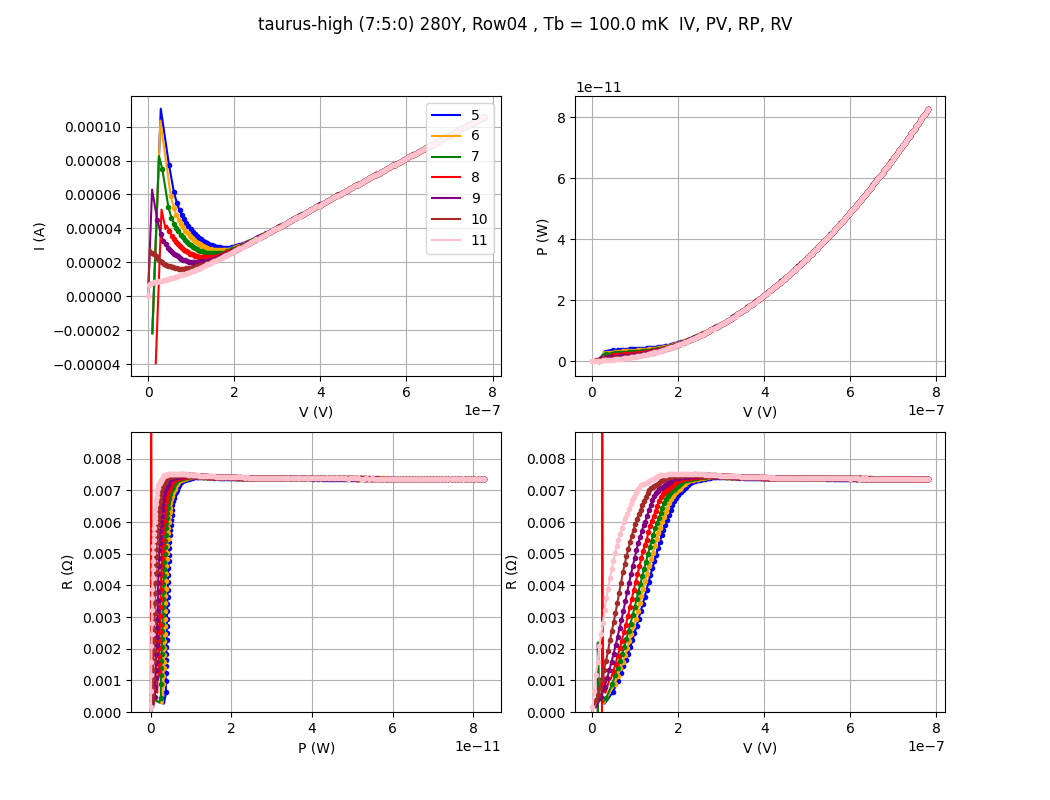

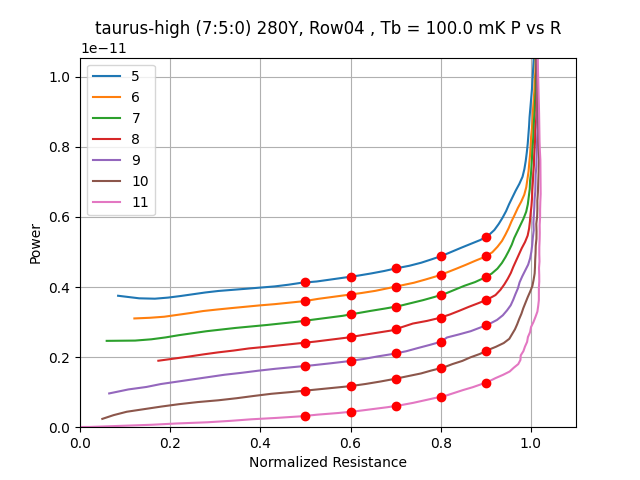

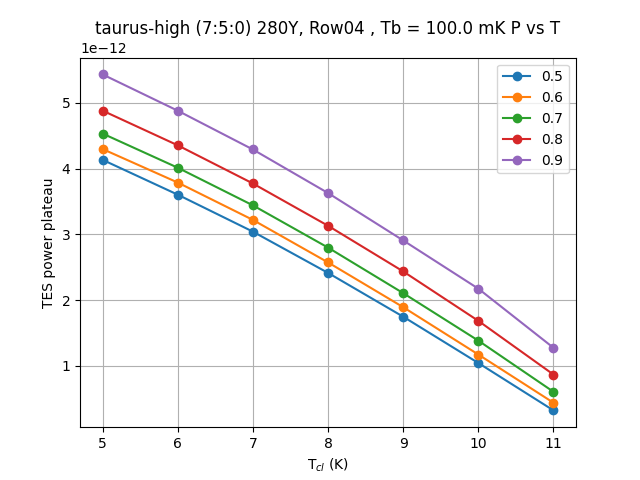

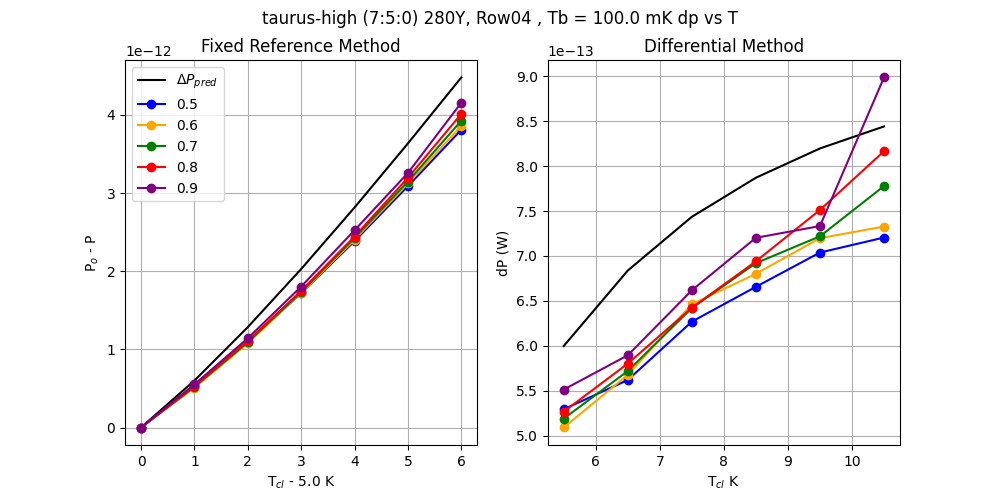

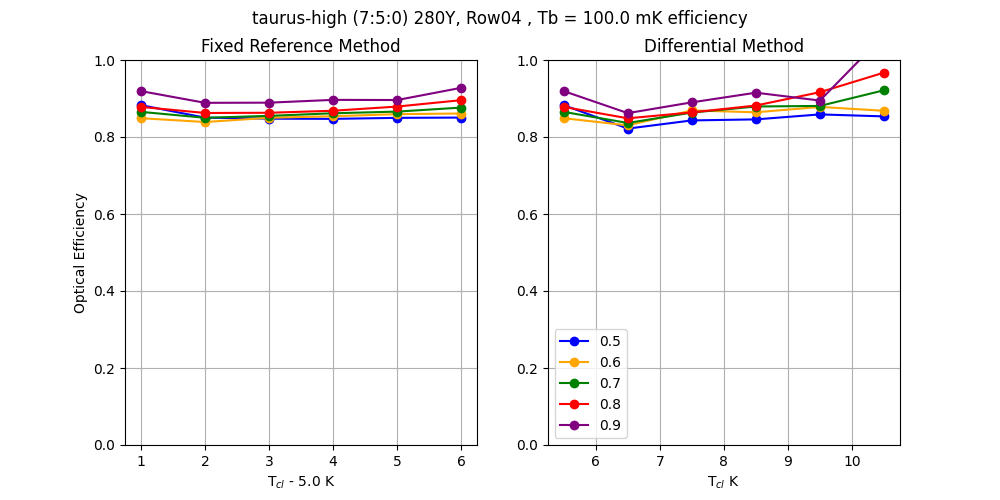

In [11]:
eta_single_row = ivcl.plot_sweep_analysis_for_row(row_index,0,cl_indices,predicted_power_w=np.array(predicted_power_w))

In [12]:
eta_single_row.eta_Dp_arr # fixed temperature reference.  

array([[0.88267408, 0.85026768, 0.84762939, 0.84710604, 0.84972019,
        0.85043665],
       [0.84881201, 0.83888724, 0.84993089, 0.85391603, 0.85937914,
        0.86101388],
       [0.86524669, 0.84990245, 0.85486525, 0.86167612, 0.86596856,
        0.87641286],
       [0.87817684, 0.86239301, 0.86293271, 0.86819839, 0.87907267,
        0.89569868],
       [0.91918731, 0.88873658, 0.88919532, 0.8964334 , 0.89603215,
        0.92779391]])

In [13]:
np.shape(eta_single_row.eta_Dp_arr) # N_resistance_fractions x M-1 coldload temperatures

(5, 6)

In [180]:
eta_single_row.eta_Dp_arr.mean(axis=1) 

array([0.85463901, 0.85198986, 0.86234532, 0.87441205, 0.90289645])

In [14]:
print('Optical efficiency (fixed ref method) of Row%02d is %.3f +/- %0.3f'%(row_index,np.mean(eta_single_row.eta_Dp_arr),np.std(eta_single_row.eta_Dp_arr)))

Optical efficiency (fixed ref method) of Row04 is 0.869 +/- 0.022


In [15]:
eta_single_row.eta_dp_arr # eta_dp_arr (not little d) is the differential method

array([[0.88267408, 0.82184175, 0.84307508, 0.84575811, 0.85869586,
        0.85352086],
       [0.84881201, 0.83018152, 0.86899478, 0.86418023, 0.87813669,
        0.86805112],
       [0.86524669, 0.83644294, 0.8634322 , 0.87921831, 0.88070666,
        0.92137353],
       [0.87817684, 0.84854791, 0.86386435, 0.88176076, 0.9164095 ,
        0.96727046],
       [0.91918731, 0.8620261 , 0.8899872 , 0.91507593, 0.89465445,
        1.0645222 ]])

In [16]:
print('Optical efficiency (diff method) of Row%02d is %.3f +/- %0.3f'%(row_index,np.mean(eta_single_row.eta_dp_arr),np.std(eta_single_row.eta_Dp_arr)))

Optical efficiency (diff method) of Row04 is 0.880 +/- 0.022


In [17]:
eta_single_row.cl_DT_k

array([0, 1, 2, 3, 4, 5, 6])

# Analysis of all devices within a pixel

In [194]:
position = 4
bath_temp_index=0
cl_indices = range(1,9)
rfracs =np.array([0.8])
rfrac_index=0
bands = dm.get_bands_for_position(position)
dm.print_data_for_position(position)

Row	devname	type	position	band	polarization	freq_edges_ghz
Row00	NC	squid	4	None	None	None
Row01	taurus-high (7:5:0) 350D	dark	4	None	None	None
Row02	taurus-high (7:5:0) 280D	dark	4	None	None	None
Row03	taurus-high (7:5:0) 350X	optical	4	350	A	[315.0, 390.0]
Row04	taurus-high (7:5:0) 280Y	optical	4	280	B	[245.0, 315.0]
Row05	taurus-high (7:5:0) 280X	optical	4	280	A	[245.0, 315.0]
Row06	taurus-high (7:5:0) 350Y	optical	4	350	B	[315.0, 390.0]
Row07	NC	squid	4	None	None	None
Row08	NC	squid	4	None	None	None


In [195]:
# get order: darks, lowest frequency A,B highest frequency A, B
row_indices = dm.get_row_nums_from_keyval_list([['position',position],['type','dark']])
for band in bands:
    for pol in ['A','B']:
        row_indices.extend(dm.get_row_nums_from_keyval_list([['position',position],['band',str(band)],['polarization',pol]]))

taurus-high (7:5:0) 280X eta =  0.8196269947614363
taurus-high (7:5:0) 280Y eta =  0.8797286121080429
taurus-high (7:5:0) 350X eta =  0.8260930406134938
taurus-high (7:5:0) 350Y eta =  0.8470062891195572


Text(0.5, 0.98, 'Position 4 taurus-high (7:5:0)')

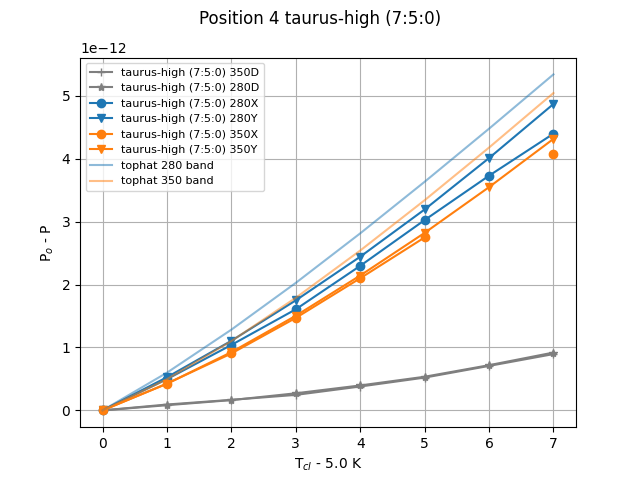

In [198]:
fig,ax = plt.subplots()
ax.set_ylabel('P$_o$ - P')
low_band_color = '#1f77b4'
high_band_color = '#ff7f0e'
dark_color = "tab:grey"#('k',0.5) #'#2ca02c'
A_style = 'o' 
B_style = 'v' 
dark_count = 0
for ii, row_dex in enumerate(row_indices):
    if dm.map_dict['Row%02d'%row_dex]['type'] not in ['Optical','optical']:
        ppower = None
    else: 
        ppower = get_predicted_power_for_row(row_dex,cl_indices)
    
    iva_row = ivcl.sweep_analysis_for_row(row_dex,bath_temp_index,cl_indices,
                                          rn_fracs=rfracs,predicted_power_w=ppower)

    if dm.map_dict['Row%02d'%row_dex]['type']=='dark':
        dark_count=dark_count+1
        color = dark_color
        if dark_count>1:
            ls = '*'
        else:
            ls='+'
    elif dm.map_dict['Row%02d'%row_dex]['band'] == str(bands[0]):
        color = low_band_color
    elif dm.map_dict['Row%02d'%row_dex]['band'] == str(bands[1]):
        color = high_band_color 

    if dm.map_dict['Row%02d'%row_dex]['polarization'] == 'A':
        ls = A_style
    elif dm.map_dict['Row%02d'%row_dex]['polarization'] == 'B':
        ls = B_style
    ax.plot(iva_row.cl_DT_k,iva_row.Dp_at_rnfrac[rfrac_index,:],label=dm.map_dict['Row%02d'%row_dex]['devname'],color=color,marker=ls)
    if ii==0:
        ax.set_xlabel('T$_{cl}$ - %.1f K'%iva_row.cl_temps_k[iva_row.T_cl_index])

    if dm.map_dict['Row%02d'%row_dex]['type']=='optical':
        print(dm.map_dict['Row%02d'%row_dex]['devname'], 'eta = ',iva_row.eta_Dp_arr[~np.isnan(iva_row.eta_Dp_arr)].mean()) 

# add tophat prediction 
for band in bands:
    if band == bands[0]:
        color = low_band_color
    elif band == bands[1]:
        color = high_band_color 
    rr = dm.get_row_nums_from_keyval_list([['position',position],['band',str(band)]])
    p = get_predicted_power_for_row(rr[0],cl_indices)
    ax.plot(iva_row.cl_DT_k,p-p[0],color=color,label='tophat %s band'%band,linestyle='-',alpha=0.5)
    
ax.legend(fontsize=8)
ax.grid()
fig.suptitle('Position %d '%position+' '.join(dm.map_dict['Row%02d'%row_indices[-1]]['devname'].split(' ')[0:2]))